In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("/tripadvisor_hotel_reviews.csv")
print(df.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


In [4]:
print("DataFrame Shape:", df.shape)
print("NULL Count:")
print(df.isnull().sum())

DataFrame Shape: (20491, 2)
NULL Count:
Review    0
Rating    0
dtype: int64


In [5]:
pos = [5]
neg = [1,2]
neu = [3,4]

def sentiment(rating):
  if rating in pos:
    return 2
  elif rating in neg:
    return 0
  else:
    return 1
df['Sentiment'] = df['Rating'].apply(sentiment)
df.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,2
4,"great stay great stay, went seahawk game aweso...",5,2


In [6]:
def caseFolding(text):
    return text.lower()

df['cleaned'] = df['Review'].apply(caseFolding)
print(df[['Review','cleaned']].head())

                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                             cleaned  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms not 4* experience hotel monaco seat...  
3  unique, great stay, wonderful time hotel monac...  
4  great stay great stay, went seahawk game aweso...  


In [7]:
def removePunctuation(text):
    return re.sub(r'[^\w\s]', '', text)

df['cleaned'] = df['cleaned'].apply(removePunctuation)
print(df[['Review','cleaned']].head())

                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                             cleaned  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms not 4 experience hotel monaco seatt...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...  


In [8]:
def tokenizeText(text):
    return word_tokenize(text)

df['tokens'] = df['cleaned'].apply(tokenizeText)
print(df[['cleaned','tokens']].head())

                                             cleaned  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                              tokens  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, not, 4, experience, hotel, monac...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...  


In [9]:
stop_words = set(stopwords.words('english'))

def removeStopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(removeStopwords)
print(df[['cleaned','tokens']].head())

                                             cleaned  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4 experience hotel monaco seatt...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                              tokens  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, 4, experience, hotel, monaco, se...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...  


In [10]:
stemmer = PorterStemmer()

def stemTokens(token):
    return [stemmer.stem(w) for w in token]
df['stemmed_tokens'] = df['tokens'].apply(stemTokens)

print(df[['tokens', 'stemmed_tokens']].head(10))

                                              tokens  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, 4, experience, hotel, monaco, se...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   
5  [love, monaco, staff, husband, stayed, hotel, ...   
6  [cozy, stay, rainy, city, husband, spent, 7, n...   
7  [excellent, staff, housekeeping, quality, hote...   
8  [hotel, stayed, hotel, monaco, cruise, rooms, ...   
9  [excellent, stayed, hotel, monaco, past, delig...   

                                      stemmed_tokens  
0  [nice, hotel, expens, park, got, good, deal, s...  
1  [ok, noth, special, charg, diamond, member, hi...  
2  [nice, room, 4, experi, hotel, monaco, seattl,...  
3  [uniqu, great, stay, wonder, time, hotel, mona...  
4  [great, stay, great, stay, went, seahawk, game...  
5  [love, monaco, staff, husband, stay, hotel, cr... 

In [11]:
lemmatizer = WordNetLemmatizer()

def lemmatizeTokens(token):
    return [lemmatizer.lemmatize(w) for w in token]

def finalText(token):
    return ' '.join(token)

df['lemma_tokens'] = df['stemmed_tokens'].apply(lemmatizeTokens)

df['final_text'] = df['lemma_tokens'].apply(finalText)
df['final_text'] = df['final_text'].apply(caseFolding)

print(df[['stemmed_tokens', 'lemma_tokens']].head(10))

                                      stemmed_tokens  \
0  [nice, hotel, expens, park, got, good, deal, s...   
1  [ok, noth, special, charg, diamond, member, hi...   
2  [nice, room, 4, experi, hotel, monaco, seattl,...   
3  [uniqu, great, stay, wonder, time, hotel, mona...   
4  [great, stay, great, stay, went, seahawk, game...   
5  [love, monaco, staff, husband, stay, hotel, cr...   
6  [cozi, stay, raini, citi, husband, spent, 7, n...   
7  [excel, staff, housekeep, qualiti, hotel, choc...   
8  [hotel, stay, hotel, monaco, cruis, room, gene...   
9  [excel, stay, hotel, monaco, past, delight, re...   

                                        lemma_tokens  
0  [nice, hotel, expens, park, got, good, deal, s...  
1  [ok, noth, special, charg, diamond, member, hi...  
2  [nice, room, 4, experi, hotel, monaco, seattl,...  
3  [uniqu, great, stay, wonder, time, hotel, mona...  
4  [great, stay, great, stay, went, seahawk, game...  
5  [love, monaco, staff, husband, stay, hotel, cr... 

In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['final_text'])
y = df['Sentiment']

corpus = df['final_text'].tolist()
tfidf_vector = TfidfVectorizer(
    smooth_idf=False,
    token_pattern=r'\b[a-zA-Z]{2,}\b',
    max_features=20
)

tfidf_matrix = tfidf_vector.fit_transform(corpus)
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vector.get_feature_names_out())
df_tfidf.head()

,beach,breakfast,clean,day,good,great,hotel,like,locat,nice,night,nt,place,restaur,room,servic,staff,stay,time,walk
0,0.0,0.000000,0.147442,0.000000,0.138058,0.125083,0.186560,0.172658,0.136314,0.764620,0.285329,0.000000,0.000000,0.0,0.272241,0.000000,0.000000,0.307398,0.000000,0.160291
1,0.0,0.370265,0.116419,0.125476,0.436041,0.098765,0.515574,0.272661,0.000000,0.120748,0.225295,0.000000,0.000000,0.0,0.429922,0.000000,0.191945,0.080907,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.085765,0.233115,0.173844,0.000000,0.000000,0.285001,0.443135,0.545519,0.000000,0.0,0.507370,0.103150,0.000000,0.254618,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.444018,0.441496,0.408599,0.161295,0.361897,0.000000,0.346352,0.000000,0.0,0.107377,0.196472,0.143820,0.242487,0.185515,0.000000
4,0.0,0.000000,0.000000,0.000000,0.112995,0.409504,0.229038,0.000000,0.111568,0.000000,0.000000,0.718718,0.137099,0.0,0.148546,0.271799,0.099481,0.167729,0.128321,0.262384


Vocabulary size: 67551


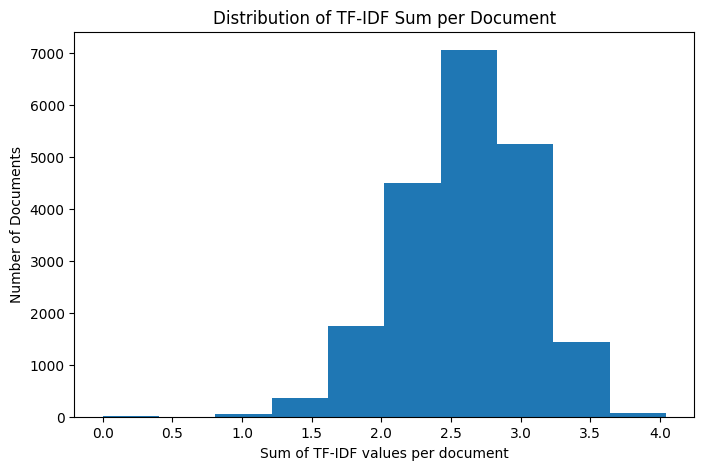

In [ ]:
tfidf_sums = df_tfidf.sum(axis=1)
print("Vocabulary size:", len(vectorizer.vocabulary_))

plt.figure(figsize=(8,5))
plt.hist(tfidf_sums)
plt.xlabel("Sum of TF-IDF values per document")
plt.ylabel("Number of Documents")
plt.title("Distribution of TF-IDF Sum per Document")
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

Sentiment
2    6337
1    5756
0    2250
Name: count, dtype: int64
Sentiment
2    2717
1    2467
0     964
Name: count, dtype: int64


In [15]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [16]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.6116
Precision: 0.6729
Recall: 0.6116
F1-score: 0.5608
